<a href="https://colab.research.google.com/github/chhandana/hello-world/blob/master/portfolioOpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import relevant libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['AAPL', 'FB', 'ROKU', 'BBY']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2018',end='12/31/2018')['Adj Close']

#Arrange the data in ascending order
data=data.iloc[::-1]
print data.round(2)




Symbols       AAPL    BBY      FB   ROKU
Date                                    
2018-12-31  155.41  51.80  131.09  30.64
2018-12-28  153.92  50.22  133.20  30.16
2018-12-27  153.84  50.82  134.52  30.46
2018-12-26  154.84  50.44  134.18  30.35
2018-12-24  144.66  47.18  124.06  27.17
2018-12-21  148.50  47.79  124.95  27.28
2018-12-20  154.51  49.31  133.40  29.66
2018-12-19  158.51  49.84  133.24  30.61
2018-12-18  163.61  50.83  143.66  31.34
2018-12-17  161.51  51.09  140.19  32.12
2018-12-14  163.03  54.16  144.06  33.42
2018-12-13  168.42  54.71  145.01  33.74
2018-12-12  166.60  57.69  144.50  35.17
2018-12-11  166.13  56.82  142.08  35.81
2018-12-10  167.09  57.38  141.85  37.20
2018-12-07  166.00  58.81  137.42  37.92
2018-12-06  172.13  60.46  139.63  40.82
2018-12-04  174.07  60.44  137.93  39.78
2018-12-03  182.08  65.04  141.09  42.17


In [0]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

Symbols     AAPL   BBY    FB   ROKU
Date                               
2018-12-31   NaN   NaN   NaN    NaN
2018-12-28 -0.96 -3.06  1.61  -1.57
2018-12-27 -0.05  1.21  0.99   0.99
2018-12-26  0.65 -0.75 -0.25  -0.36
2018-12-24 -6.58 -6.46 -7.54 -10.48
2018-12-21  2.66  1.29  0.72   0.40
2018-12-20  4.05  3.17  6.76   8.72
2018-12-19  2.59  1.09 -0.12   3.20
2018-12-18  3.22  1.98  7.82   2.38
2018-12-17 -1.28  0.50 -2.42   2.49
2018-12-14  0.94  6.01  2.76   4.05
2018-12-13  3.31  1.01  0.66   0.96
2018-12-12 -1.08  5.45 -0.35   4.24
2018-12-11 -0.28 -1.51 -1.67   1.82
2018-12-10  0.58  0.98 -0.16   3.88
2018-12-07 -0.65  2.51 -3.12   1.94
2018-12-06  3.70  2.81  1.61   7.65
2018-12-04  1.13 -0.03 -1.22  -2.55
2018-12-03  4.60  7.60  2.29   6.01


In [0]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

Symbols
AAPL    0.009181
BBY     0.013221
FB      0.004645
ROKU    0.018768
dtype: float64
Symbols      AAPL       BBY        FB      ROKU
Symbols                                        
AAPL     0.000715  0.000562  0.000707  0.000848
BBY      0.000562  0.001063  0.000603  0.001108
FB       0.000707  0.000603  0.001176  0.000960
ROKU     0.000848  0.001108  0.000960  0.001805


In [0]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 100000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [0]:
for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(4))
        weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))

#Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev

#Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

#Save the weights in the array
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print sim_frame.head (5)
print sim_frame.tail (5)







        ret     stdev    sharpe      AAPL        FB      ROKU       BBY
0  0.010127  0.027701  0.365571  0.249397  0.491417  0.249552  0.009634
1  0.010039  0.028256  0.355287  0.357213  0.233873  0.283734  0.125180
2  0.011004  0.028795  0.382143  0.146434  0.618739  0.207349  0.027478
3  0.009945  0.028810  0.345184  0.404176  0.120487  0.303069  0.172268
4  0.012779  0.032061  0.398581  0.168694  0.210219  0.226994  0.394093
            ret     stdev    sharpe      AAPL        FB      ROKU       BBY
99995  0.011099  0.027507  0.403511  0.632640  0.190746  0.038647  0.137967
99996  0.010331  0.030437  0.339418  0.233727  0.125151  0.389604  0.251517
99997  0.014700  0.033453  0.439427  0.094133  0.433502  0.053895  0.418471
99998  0.010146  0.028121  0.360817  0.210150  0.466454  0.284614  0.038781
99999  0.013298  0.034904  0.380981  0.030233  0.093587  0.330051  0.546129


In [0]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print "The portfolio for max Sharpe Ratio:\n", max_sharpe
print "The portfolio for min risk:\n", min_std



The portfolio for max Sharpe Ratio:
ret       0.016330
stdev     0.036267
sharpe    0.450291
AAPL      0.050572
FB        0.351711
ROKU      0.000137
BBY       0.597580
Name: 93127, dtype: float64
The portfolio for min risk:
ret       0.010224
stdev     0.026092
sharpe    0.391828
AAPL      0.736797
FB        0.256498
ROKU      0.004130
BBY       0.002575
Name: 5075, dtype: float64


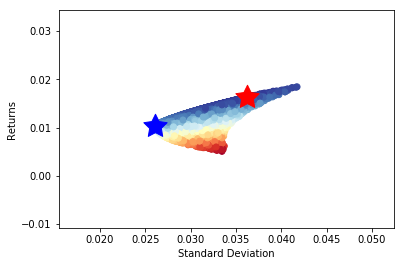

In [0]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
#plt.ylim(-0.003,.001)
#plt.xlim(0.0075,0.0125)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()